## 3.6. Generalization

* 예시) 과거의 시험 문제를 외운 학생보다는, 문제 해결 패턴을 파악한 학생이 평균적으로 좋은 성적을 유지할 수 있음  
$\rightarrow$ ML 사용의 목표: 과거에 학습했던 데이터를 단순히 암기하는 것이 아닌 공통된 패턴을 발견하는 것

* Generalization은 주어진 훈련 데이터에만 잘 적합(overfitting)되는 것이 아닌 일반적인 패턴을 찾는 것

### 3.6.1. Training Error and Generalization Error

* IID assumption
    * 일반적인 supervised learning 설정에서 사용하는 가정
    * 훈련에 사용하는 데이터 $P(X,Y)$ 와 테스트 데이터 $Q(X,Y)$가 동일한(identical) 분포에서 독립적(independent)으로 추출된다는 가정

<br/>

* 훈련 데이터에서 계산된 training error $R_{emp}$
$$R_\text{emp}[\mathbf{X}, \mathbf{y}, f] = \frac{1}{n} \sum_{i=1}^n l(\mathbf{x}^{(i)}, y^{(i)}, f(\mathbf{x}^{(i)}))$$

<br/>

* Generalization error $R$
$$R[p, f] = E_{(\mathbf{x}, y) \sim P} [l(\mathbf{x}, y, f(\mathbf{x}))] =
\int \int l(\mathbf{x}, y, f(\mathbf{x})) p(\mathbf{x}, y) \;d\mathbf{x} dy.$$

<br/>

* Generalization error는 $p(x,y) 형태를 알 수 없기 때문에 정확히 계산 불가
* 훈련 데이터 $X', y'$로 만든 모델은 전적으로 사용된 데이터에만 의존하기 때문에  
   모집단에 대해 biased estimation이며, generalization error를 추정하기에 부적합
* Generalization의 핵심 목적은 training error와 generalization error를 가깝게 만드는 것

#### 3.6.1.1 Model Complexity

* 일반적으로 많은 데이터 + 단순한 모델을 사용할 때 training error와 generalization error가 가까워 지는 경향이 있음  
 $\rightarrow$ 적은 데이터 + 복잡한 모델은 두 error의 차이를 크게 함
<br/>  
* Model Complexity를 두 가지 관점으로 정의하자면,
    1. 모델이 가진 parameter의 개수
    2. 모델 내 parameter가 가질 수 있는 값의 범위
<br/>  
* 많은 parameter를 가졌거나, 가능한 값의 범위가 넓어도 좋은 모델이 될 수 있음  
 $\rightarrow$ Model Complexity를 명확하게 정의하는 것은 어려움
<br/>
* 낮은 traing error 만으로 generalization error의 높고 낮음을 판단할 수 없음  
 $\rightarrow$ Holdout data를 이용해 판단


### 3.6.2 Underfitting or Overfitting

* Overfitting
    * Training error가 generalization(validation) error보다 훨씬 낮은 경우
    * 딥러닝을 활용한 예측 모델은 training error가 더 낮음에도 좋은 예측 성능을 갖는 사례가 많아 overfitting을 항상 나쁘게 볼 수 없음
    * Generalization error와 training error의 차이를 줄이는 것이 목적
    

* Underfitting
    * 모델이 training error를 충분히 줄이지 못한 경우
    * 데이터가 가진 패턴을 찾아내기에 모델이 너무 단순할 수 있으며, 복잡한 모델을 사용해야 함

![Influence of model complexity on underfitting and overfitting](http://d2l.ai/_images/capacity-vs-error.svg)


* 훈련 데이터의 양을 늘리는 것이 generalization에 가장 좋은 방법
* Model Complexity가 훈련 데이터의 양보다 더 빠르게 증가하지 않도록 주의

### 3.6.3. Model Selection

* 일반적으로는 다양한 모델 구조, feature, 전처리 등의 방법에 따라 다양한 모델을 구성 및 평가 후 최종 모델을 선택
* 모델을 선택하는 과정에서 테스트 데이터가 관여할 경우, 테스트 데이터에 overfitting될 위험 주의
* Holdout data를 따로 구성하거나, Cross Validation을 사용할 것

<br/>
<br/>
<br/>

## 3.7. Weight Decay

* Overfitting을 막기 위한 가장 좋은 방법은 데이터를 더 확보하는 것
* Weight Decay는 model complexity를 조정하기 위해 사용할 수 있는 방법

### 3.7.1. Norms and Weight Decay
* Weight decay는 parameter 수를 조정하는 대신, paramter가 가질 수 있는 값의 범위를 제한
* 어떤 입력에도 0을 출력하는 $f=0$ 간단한 함수를 기준으로 parameter의 거리로 complexity 측정
* Parameter 값을 제한하기 위해 위 거리를 penalty term으로 추가

* 예시) mse
$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2$$

* 위 예시에 penalty term ($\ell_2$ norm) 추가
$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2 + \frac{\lambda}{2} \|\mathbf{w}\|^2.$$

* $\lambda$로 panelty의 강도를 조정하며, $\lambda=0$의 경우 원래 loss만을 사용

* $\ell_2$ norm의 사용은 모든 paramter가 균등하게 작아지는 경향을 보이며, 특정 feature의 오류에 robust한 모델을 얻을 수 있음  
  $\ell_2$-regularized linear regression $\rightarrow$ Ridge Regression
* $\ell_1$ norm의 사용은 많은 paramter를 0으로 만들어 중요 feature만을 선택할 수 있음  
  $\ell_1$-regularized linear regression $\rightarrow$ Lasso Regression


### 3.7.2 High-Dimensional Linear Regression

합성 데이터를 이용한 weight decay 예제

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

다음과 같이 데이터를 생성

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$

Overfitting 효과를 보여주기 위해 gaussian noise를 추가

In [2]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

### 3.7.3 Implementation from Scratch

* Minibatch stochastic gradient descent 및 손실 함수에 $\ell_2$ penalty 추가

In [3]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

#### 3.7.3.2 Defining the Model

* 이전에 사용한 regression 모델 및 loss에 penalty term을 포함

In [4]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return super().loss(y_hat, y) + self.lambd * l2_penalty(self.w)

* 20개 훈련 데이터로 모델을 적합시키고, 100개의 검증 데이터로 모델을 평가

In [5]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

#### 3.7.3.3 Training without Regularization

* $\lambda = 0$ 으로 weight decay를 사용하지 않는 경우,
training error만 감소하여 overfitting

L2 norm of w: 0.0093766488134861


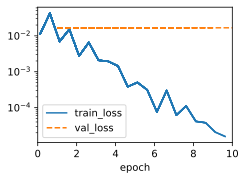

In [6]:
train_scratch(0)

#### 3.7.3.4 Using Weight Decay

Weight decay를 사용하는 경우, validation error도 함께 감소

L2 norm of w: 0.0013421037001535296


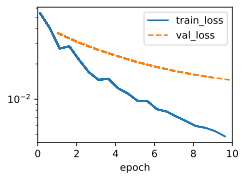

In [7]:
train_scratch(3)

<br/>
<br/>
<br/>
<br/>
<br/>

# 4. Linear Neural Networks for Classification

## 4.1 Softmax Regression


* how much? how many? $\rightarrow$  **Regression**
* which category? $\rightarrow$ **Classification**
    * 가입할 가능성이 높은 서비스
    * 다음에 볼 가능성이 가장 큰 영화
    * 이미지에 나타난 동물의 종류 


* Classification을 두 종류로 구분할 수 있지만, 모두 동일한 모델을 사용  
    1. 카테고리 자체만을 추정 (hard assignment)
    2. 각 카테고리의 가능성 추정 (soft assignment)


* 두 개 이상의 카테고리가 모두 속하는 경우 $\rightarrow$ **Multi-label Classification**
    * ex) 뉴스 기사가 포함하는 주제 (엔터테인먼트, 비즈니스 등)

### 4.1.1. Classification

예) 입력 이미지(2x2)에 대해 "cat", "chicken", "dog" 구별하기

* 예측하려는 카테고리에 순서 정보가 없다면 *one-hot encoding*으로 표현
* *one-hot encoding*은 카테고리 개수를 차원 수로 갖는 벡터이며, 해당 카테고리만 1로 설정, 나머지는 0
    * "cat": (1,0,0)
    * "chicken": (0,1,0)
    * "dog": (0,0,1)

#### 4.1.1.1 Linear Model

* 모든 카테고리에 대해 확률을 추정하기 위해, 12개의 $w$ (4개 feature x 3종류의 카테고리) 및 3개 $b$가 필요

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

<br/>

* 다음과 같은 1개의 *fully connected layer*를 활용해 모델 구성 

![Softmax regression is a single-layer neural network.](http://d2l.ai/_images/softmaxreg.svg)


#### 4.1.1.2 The Softmax

* 단순하게 regression 하듯 출력 $o$와 $y$ 사이를 최소화할 수 있으며, 생각보다 잘 작동하지만 몇 가지 한계점이 존재
    * 각 출력을 확률로 간주하기 위해서 $o_i$ 의 합이 1이 되어야 함
    * 각 출력 $o_i$가 0 이상의 양수를 가져야 함  
    $\rightarrow$ 출력 값을 제한하도록 하는 계산이 필요
    
    
    
* 지수 함수 $P(y = i) \propto \exp o_i$ 를 사용
    * 확률 $o_i$가 증가함에 따라 연산 결과도 단조 증가
    * 모든 결과가 양수를 가짐
    
    
    
* 각 값의 합을 나누어서 최대 값이 1이 되도록 변환 $\rightarrow$ **Softmax**

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \text{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}$$

* *Softmax*의 결과는 크기 순서를 유지하기 때문에 카테고리 결정만을 위해서는 계산할 필요 없음

$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

### 4.1.2. Loss Function

#### 4.1.2.1. Log-Likelihood
* 입력 feature $\mathbf{x}$가 주어졌을 때 softmax 결과는 각 카테고리의 조건부 확률로 해석 가능  
$$\hat{y}_1 = P(y=\text{cat} \mid \mathbf{x})$$


* Liklihood는 실제 one-hot vector와 각 카테고리 확률의 곱으로 정의
<!-- $$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
$$ -->
$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n \hat{y}_i^{y_i}
$$
* 예시) 예측 값 = [0.3, 0.1, 0.6], 실제 값 = [0, 0, 1] $\rightarrow$ likelihood: 0.6

<br/>

   
* 계산의 편의를 위해 log 적용 ($log(ab) = log(a) + log(b)$)
* 최대화가 아닌 (loss를) 최소화하기 위해 음수를 취함
$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = -\sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}) =  - \sum_{j=1}^q y_j \log \hat{y}_j 
$$

<!-- $$
-\log P(\mathbf{Y} \mid \mathbf{X}) = - \sum_{i=1}^n (y_i \log{\hat{y}}_i + (1-y_i)\log{(1-\hat{y}_i}))
$$ -->

* Loss function
$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j $$

### 4.1.3. Information Theory Basics

#### 4.1.3.1. Entropy
* 데이터에 얼마나 많은 정보가 들어있는지 정량화
* $P$의 *entropy* 
$$H[P] = \sum_j - P(j) \log P(j)$$



#### 4.1.3.2. Surprisal
* 데이터가 모두 동일한 값으로 구성되어 있다면 쉽게 예측 가능
* 각각 다른 값으로 구성되어 있는 데이터는 놀랍다

#### 4.1.3.3. Cross-Entropy Revisited
* Cross entropy $H(P,Q)$는 실제 확률 $P$에 대해 계산된 확률 $Q$를 비교해 얻는 surprise의 정도
$$H(P, Q) \stackrel{\mathrm{def}}{=} \sum_j - P(j) \log Q(j)$$

* $P=Q$ 일 때, 가장 낮은 cross entropy 이며, $P$의 entorpy $H(P)$와 같음 

* Cross Entropy는 suprise를 최소화 하기 위한 $Q$를 출력하도록 함

<br/>
<br/>

## 4.2. The Image Classification Dataset


In [8]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1. Loading the Dataset
* Fashion-MNIST 데이터셋 예시

In [9]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

* 6만개 훈련 데이터 및 1만개 검증 데이터로 구성

In [10]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

* 각 이미지의 크기는 32x32

In [11]:
data.train[0][0].shape

torch.Size([1, 32, 32])

* 최대 값에 해당하는 index가 어떤 카테고리인지 확인

In [12]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

* 256개 batch 및 28x28로 resize

In [13]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


#### 4.2.3. Visualization


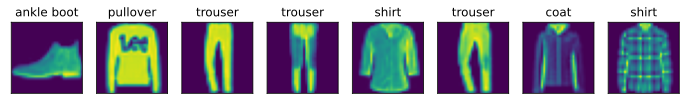

In [14]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

<br/>
<br/>

## 4.3. The Base Classification Model


In [15]:
import torch
from d2l import torch as d2l

### 4.3.1. The Classifier Class

* 검증 단계마다 loss 및 accuracy를 표시
* Optimizer 설정

In [16]:
class Classifier(d2l.Module):  #@save
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)


@d2l.add_to_class(d2l.Module)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2. Accuracy

* argmax를 이용해 가장 값이 큰 항목을 예측된 카테고리로 사용

In [17]:
@d2l.add_to_class(Classifier)  #@save
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

<br/>
<br/>

## 4.4. Softmax Regression Implementation from Scratch


### 4.4.1. The Softmax

In [18]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$$

In [19]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition 


X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1225, 0.1694, 0.2080, 0.2581, 0.2420],
         [0.2059, 0.1234, 0.2037, 0.1886, 0.2785]]),
 tensor([1., 1.]))

### 4.4.2 The Model

* 입력 이미지(행렬)를 1개 차원의 벡터로 변환
* 28x28 $\rightarrow$ 784

In [20]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]


@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    return softmax(torch.matmul(X.reshape((-1, self.W.shape[0])), self.W) + self.b)

### 4.4.3. The Cross-Entropy Loss

* 3개 카테고리가 있을 때, 효율적인 indexing 예시

In [21]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [22]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [23]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

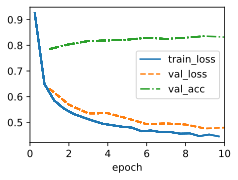

In [24]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [25]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

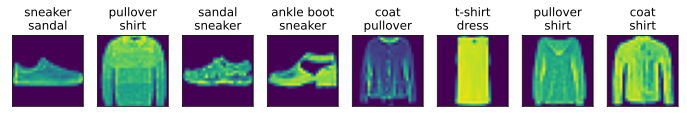

In [26]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

<br/>
<br/>
<br/>

## 4.5. Concise Implementation of Softmax Regression

In [27]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 4.5.1. Defining the Model

In [28]:
class SoftmaxRegression(d2l.Classifier):
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))
    def forward(self, X):
        return self.net(X)

### 4.5.2. Softmax Revisited
$$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$

* 위 식에서 $\exp{o_k}$ 값이 매우 크거나 작은 경우 계산이 불안정하거나 불가능
    * single precision 기준 범위 $[10^{-38}, 10^{38}]$
* 일반적으로 $o$가 $[-90,90]$ 범위 밖은 불안정하므로 값의 범위를 제한
$$
\hat y_j = \frac{\exp o_j}{\sum_k \exp o_k} =
\frac{\exp(o_j - \bar{o})}{\sum_k \exp (o_k - \bar{o})}.
$$

In [29]:
@d2l.add_to_class(d2l.Classifier)  
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

### 4.5.3. Training

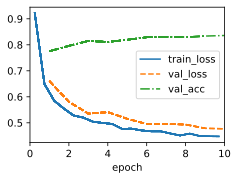

In [30]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)